#### Experimentation guided example

#### Setting the Stage

So let's talk about the scenario. For this example we're going to use a generic marketing scenario focused on email conversion. Many companies in a variety of industries run email campaigns to get people to sign up for a service. Even if your interest is not in marketing, any experiment designed to elicit a discrete response will be similarly constructed.

Our theoretical company is a social networking site, called BlueBird. BlueBird has been using the same advertising email for years, and some at the company are starting to feel that it's getting a little stale. Ever the data driven individual, you propose an experiment. The marketing department draws up a new version of the email, and you'll conduct an A/B test comparing the two emails.

#### Before Rollout

You may want to roll out the experiment right away, but there is so much to do beforehand! Getting an experiment ready to go out the door is serious business. It will make everything that comes after easier and make sure you're making well thought out decisions all the way through.

Now the research proposal or similar document can play a huge role in this prep process. That should contain a detailed description of the motivation of the experiment, what exactly the change is, and a plan for rollout. For this experiment, let's highlight a few elements of the research proposal here, rather than report the whole document.

**Copy of Both Emails.** This is useful so that anyone looking into the experiment can use the research proposal to actually see what happens.

**Rollout Plan.** Knowing how many people you intend to treat with your new email and how long this is going to take is important. It's not only a key aspect of the experiment itself, but also something you're likely to be asked about by other people who care about the outcome. Often times, though 50:50 rollouts are the fastest, a gradual rollout will be used to ensure that there are no negative consequences of the experiment or if things are broken or severely degraded it can be rolled back quickly. In this case we'll do two weeks at 10% and then two weeks at 50%. That will lead to about 30,000+ in treatment, which is a nice sized sample.

*As a note, if you want to do a more rigorous calculation of sample size, you can do power calculations beforehand. Power is the probability of rejecting a false null hypothesis. This uses the formula for t-test to see what effect would be detectable at a given sample size also referred to as 'N'.*

**Success Metric.** It may seem obvious, but defining success before rolling out an experiment is a key thing to do. Usually this means picking the key metric of interest and setting the degree of significance you want to have. For a t-test this is typically a p-value of .05, and that's what we'll do here. Our success metric will be signups (also called conversions).

**Secondary Metrics.** It's easier to evaluate success if you have one success metric, but that doesn't mean that's all you look at. There can be many other metrics of interest, and monitoring them will ensure that you're not having an adverse effect on other things that matter. In this case let's make time from email to signup a secondary metric.

**Other Things to Do...**

You should also _test the infrastructure_, if any, before rolling out. In this case that means making sure the email is set up properly to be sent out when the experiment turns on. If it's manual, that's pretty easy (make sure it's formatted properly and the email is generally deliverable). If you use a service, sending some test emails to test accounts is probably a good idea. This can be either an engineering or a data science task, depending on complexity.

Make sure you have a _method for randomly sampling subjects_, and know if people stay in test or control permanently. This can matter for something like emails if people receive multiple messages. Should they only receive the new style of email or should each email be random? For simplicity, we'll assume each individual is only emailed once.

This is also a good time to check if there is any potential collision with other events or experiments. You want to run experiments in times that are representative of standard operations (unless your experiment is explicitly about how to handle an extreme situation). If you were testing marketing strategies for football betting behavior right before the Super Bowl, for example, you might see some weird behaviors that would make your findings not broadly applicable. You also don't want to test two things that are related at the same time.

Another consideration is segmentation of your sample. Sometimes you don't want to test on the entire population. Maybe you'll pick specific cities (in which case it may be appropriate to sample those in a representative fashion) or test a specific age group or tenure of user. Make these decisions early as they will help inform later analysis and possibly how the experiment is functionally set up. For here we'll just assume we're small enough to test on the entire population.

Finally, it is good practice to give everyone a chance to review the research proposal and provide feedback. Sometimes this is done through a kickoff meeting while other companies may have less formal processes. Make sure everyone involved is aware of the plan and bought in before rolling out.

After all of this is done, and the boxes are all checked, you're ready to roll. Let's say we flipped the switch and turned the experiment on at 10% on April 1, 2016.

#### Two Weeks In

Of course, you would monitor the experiment throughout its time in the wild, but two weeks in when considering turning up the proportion is a good time to do some analytics to see how things are performing before you roll forward to 50%.

We've got a file for what the data looks like up to this point. Save this CSV to your local environment in the same folder as your notebook as experiment_data_2_wks.csv.

https://github.com/Thinkful-Ed/data-201-resources/blob/master/1.4.11_experimentation_guided_example/experiment_data_2_wks.csv

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv("https://github.com/Thinkful-Ed/data-201-resources/raw/master/1.4.11_experimentation_guided_example/experiment_data_2_wks.csv")

In [4]:
PATH = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/1.4.11_experimentation_guided_example/experiment_data_2_wks.csv'
experiment_data = pd.read_csv(PATH)

In [6]:
df.head(10)

,treatment_date,test,is_signed_up,signup_date
0,2016-04-01,0,0,NaN
1,2016-04-01,0,0,NaN
2,2016-04-01,0,0,NaN
3,2016-04-01,0,0,NaN
4,2016-04-01,0,0,NaN
5,2016-04-01,0,0,NaN
6,2016-04-01,1,1,2016-04-02
7,2016-04-01,0,0,NaN
8,2016-04-01,0,0,NaN
9,2016-04-01,0,0,NaN


the data seems to have a few columns. treatment_date shows the date of the email being sent. test is a binary indicator if they were in test or control. is_signed_up shows if they successfully signed up. signup_date is the date of signup.

In [36]:
control_summary = df[df['test'] == 0].describe()
control_summary

,test,is_signed_up
count,30241.0,30241.000000
mean,0.0,0.147085
std,0.0,0.354197
min,0.0,0.000000
25%,0.0,0.000000
50%,0.0,0.000000
75%,0.0,0.000000
max,0.0,1.000000


In [37]:
test_summary = df[df['test'] == 1].describe()
test_summary

,test,is_signed_up
count,3372.0,3372.000000
mean,1.0,0.137011
std,0.0,0.343910
min,1.0,0.000000
25%,1.0,0.000000
50%,1.0,0.000000
75%,1.0,0.000000
max,1.0,1.000000


In [18]:
df.columns.unique()

Index(['treatment_date', 'test', 'is_signed_up', 'signup_date'], dtype='object')

##### How large is each group?

In [38]:
control_n = len(df[df['test'] == 0])
test_n = len(df[df['test'] == 1])

print('Control size is ',control_n, 
      ' Test size is ',test_n)

Control size is  30241  Test size is  3372


In [32]:
#another way to determine count of each group
cont_x = df.loc[df['test'] == 0].count()
cont_x

treatment_date    30241
test              30241
is_signed_up      30241
signup_date        4448
dtype: int64

In [33]:
#another way to determine count of each group
test_x = df.loc[df['test'] == 1].count()
test_x

treatment_date    3372
test              3372
is_signed_up      3372
signup_date        462
dtype: int64

##### What is the signup rate of test and control?

In [22]:
cont_sup = df.loc[(df['test'] == 0) & (df['is_signed_up'] == 1), 'is_signed_up'].count()
test_sup = df.loc[(df['test'] == 1) & (df['is_signed_up'] == 1), 'is_signed_up'].count()

print('Control sign-up is ',cont_sup, 
      ' Test sign-up is ',test_sup)

Control sign-up is  4448  Test sign-up is  462


In [28]:
#another way to determine how many signed up
cont_x = df.loc[df['test'] == 0, 'is_signed_up'].sum()
test_x = df.loc[df['test'] == 1, 'is_signed_up'].sum()
cont_x, test_x

(4448, 462)

##### Is the experiment already significant?

In [39]:
#these data match summary stastics above
cont_mean = cont_sup/control_n
test_mean = test_sup/test_n
cont_mean, test_mean

(0.14708508316523924, 0.13701067615658363)

In [40]:
#calculate standard error
cont_std = 0.354197
test_std = 0.343910
cont_se = cont_std/np.sqrt(control)
test_se = test_std/np.sqrt(test)
print(cont_se, test_se)

0.002036792580838937 0.0059224447944090835


In [41]:
# standard error on the difference between the samples
sed = np.sqrt(cont_se**2.0 + test_se**2.0)
sed

0.006262896802613291

In [42]:
# calculate the t statistic week 2
t_stat2 = (cont_mean - test_mean)/ sed
t_stat2

1.6085858231692254

In [43]:
# Code from module
# Are the test and control groups significantly different?
stats.ttest_ind(df[df.test == 1].is_signed_up,
                df[df.test == 0].is_signed_up)

Ttest_indResult(statistic=-1.5711354292574262, pvalue=0.11616060761145311)

p-value >0.05 = not significant, test e-mail did not perform better than control

Possible reason for poor result of test may be small sample size compared to control. 

Secondary metric: time-frames? 

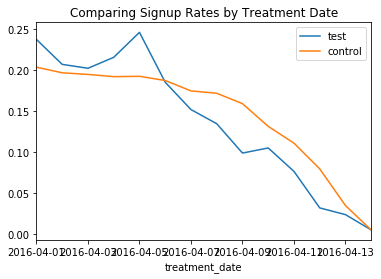

T-Test Results by Date
Ttest_indResult(statistic=1.171015382328547, pvalue=0.24172432121696255)
Ttest_indResult(statistic=0.39163213374090855, pvalue=0.6953630758340448)
Ttest_indResult(statistic=0.24114731791032132, pvalue=0.8094651742723448)
Ttest_indResult(statistic=1.006146671265253, pvalue=0.3144281887767212)
Ttest_indResult(statistic=1.7950152227404037, pvalue=0.0727950243234006)
Ttest_indResult(statistic=-0.07142256949339083, pvalue=0.943068118381282)
Ttest_indResult(statistic=-0.99645401324533, pvalue=0.31911047625459077)
Ttest_indResult(statistic=-1.4059315672051254, pvalue=0.1598930922410899)
Ttest_indResult(statistic=-2.772772511643487, pvalue=0.0055926512303104605)
Ttest_indResult(statistic=-1.301097855458891, pvalue=0.19332775805677105)
Ttest_indResult(statistic=-1.6243695706046337, pvalue=0.10443285596458776)
Ttest_indResult(statistic=-2.559540254853317, pvalue=0.010550250694229046)
Ttest_indResult(statistic=-0.851793126290792, pvalue=0.3944212121535955)
Ttest_indResult(s

In [44]:
fig = df[df.test==1][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot()
df[df.test==0][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot(ax=fig)
plt.legend(['test','control'])
plt.title('Comparing Signup Rates by Treatment Date')
plt.show()


# Generate a test statistic comparing test and control on treatment date
print('T-Test Results by Date')

for date in df.treatment_date.unique():
    dated_data = df[df.treatment_date == date]
    print(stats.ttest_ind(dated_data[dated_data.test == 1].is_signed_up,
                          dated_data[dated_data.test == 0].is_signed_up))

So what you see is that the test group is converting slower than the control group. But if you look just at the group treated in the first few days, they're not that different in signup rate. The rates seem to converge as time passes after sending the email.

This means the difference could be a time effect rather than a rate effect. Time plays a huge role in almost all experiments. Not all behaviors are immediate. Sometimes it takes a while to figure out a new feature. Other times there is novelty effect from the new feature that leads to a spike in activity. Letting these things play out is an inexact, but important, feature of experimental design.

#### Final data

https://github.com/Thinkful-Ed/data-201-resources/blob/master/1.4.11_experimentation_guided_example/experiment_data_final.csv

In [46]:
PATH = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/1.4.11_experimentation_guided_example/experiment_data_final.csv'
experiment_data = pd.read_csv(PATH)

In [47]:
# How large is each group?
print('test sample size:', len(experiment_data[experiment_data.test == 1]))
print('control sample size:', len(experiment_data[experiment_data.test == 0]))
print('test proportion:', experiment_data.test.mean())
print()

# What is the signup rate of test and control?
print('test signup rate:', experiment_data[experiment_data.test == 1].is_signed_up.mean())
print('control signup rate:', experiment_data[experiment_data.test == 0].is_signed_up.mean())

# Is the experiment already significant?
stats.ttest_ind(
    experiment_data[experiment_data.test == 1].is_signed_up,
    experiment_data[experiment_data.test == 0].is_signed_up)

test sample size: 19861
control sample size: 46867
test proportion: 0.2976411701234864

test signup rate: 0.2421328231206888
control signup rate: 0.19937269293959503


Ttest_indResult(statistic=12.368130184147793, pvalue=4.248167714911685e-35)

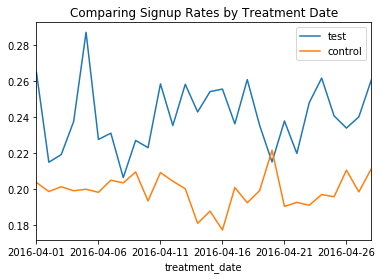

T-Test Results by Date
Ttest_indResult(statistic=2.109324797220635, pvalue=0.03503362670270496)
Ttest_indResult(statistic=0.6192500966292611, pvalue=0.5358074588708265)
Ttest_indResult(statistic=0.5679550900332947, pvalue=0.5701279663761336)
Ttest_indResult(statistic=1.6188051066317655, pvalue=0.1055969402778888)
Ttest_indResult(statistic=2.8685447266859416, pvalue=0.004164832495654052)
Ttest_indResult(statistic=0.96535203316303, pvalue=0.33447754270147856)
Ttest_indResult(statistic=1.0646969669150483, pvalue=0.2870993136921545)
Ttest_indResult(statistic=0.10372657556539404, pvalue=0.9173962881267106)
Ttest_indResult(statistic=0.7109875532022712, pvalue=0.4771475732556426)
Ttest_indResult(statistic=1.234910031428132, pvalue=0.2169634842483128)
Ttest_indResult(statistic=1.7524585316828551, pvalue=0.07982714269646307)
Ttest_indResult(statistic=1.0772576129054874, pvalue=0.2814883969553773)
Ttest_indResult(statistic=1.9956610823589083, pvalue=0.046093372990527584)
Ttest_indResult(statisti

In [48]:

fig = experiment_data[experiment_data.test==1][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot()
experiment_data[experiment_data.test==0][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot(ax=fig)
plt.legend(['test','control'])
plt.title('Comparing Signup Rates by Treatment Date')
plt.show()


# Generate a test statistic comparing test and control on treatment date
print('T-Test Results by Date')

for date in experiment_data.treatment_date.unique():
    dated_data = experiment_data[experiment_data.treatment_date == date]
    print(stats.ttest_ind(dated_data[dated_data.test == 1].is_signed_up,
                          dated_data[dated_data.test == 0].is_signed_up))

new email seems to be a significant improvement on the old email, but at a slower rate of conversion. So as long as BlueBird isn't desperate for signups in the next few days, the change seems worth it. In this case, however, it would also be worth working with the advertising and engineering teams to see if you could figure out why conversation was slower for the test email. That could inform whether the effect might change over time.

It's worth having an additional note on t-testing here again. We used a t-test in this exercise, but we could actually use a different test to gain a bit more power. Because the sample is a proportion, we know more about their distributions than the t-test assumes. Specifically, the distribution of the mean is normal, meaning we could use something called a two sample proportional z-test. We haven't covered this test yet, but you can read about it here. Find a python implementation for this test and go back and revise our testing. What difference does our new test make?
